In [1]:
# Install dependencies.
from google.colab import drive
# drive.mount('/content/drive')

!rm -r sample_data
!pip install -qq --upgrade transformers compel accelerate diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
# Set the details for your model here:
import torch

from diffusers import AutoencoderKL, StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline, \
KDPM2AncestralDiscreteScheduler, DPMSolverSinglestepScheduler, DPMSolverMultistepScheduler, PNDMScheduler, \
DDIMScheduler, LMSDiscreteScheduler, DDPMScheduler, HeunDiscreteScheduler, UniPCMultistepScheduler, \
DEISMultistepScheduler, KDPM2DiscreteScheduler, EulerAncestralDiscreteScheduler, EulerDiscreteScheduler

use_refiner = True

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
base = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
# base.load_lora_weights("stabilityai/stable-diffusion-xl-base-1.0", weight_name="sd_xl_offset_example-lora_1.0.safetensors", alpha=0.5)

_ = base.to("cuda")

if use_refiner:
  refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0",
      vae=vae,
      text_encoder_2=base.text_encoder_2,
      torch_dtype=torch.float16,
      variant="fp16",
      use_safetensors=True,
  )
  # refiner.scheduler = scheduler
  _ = refiner.to("cuda")

tokenizer = base.tokenizer            # cpu
tokenizer_2 = base.tokenizer_2        # cpu
text_encoder = base.text_encoder      # cuda
text_encoder_2 = base.text_encoder_2  # cuda
unet = base.unet                      # cuda

torch.cuda.empty_cache()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

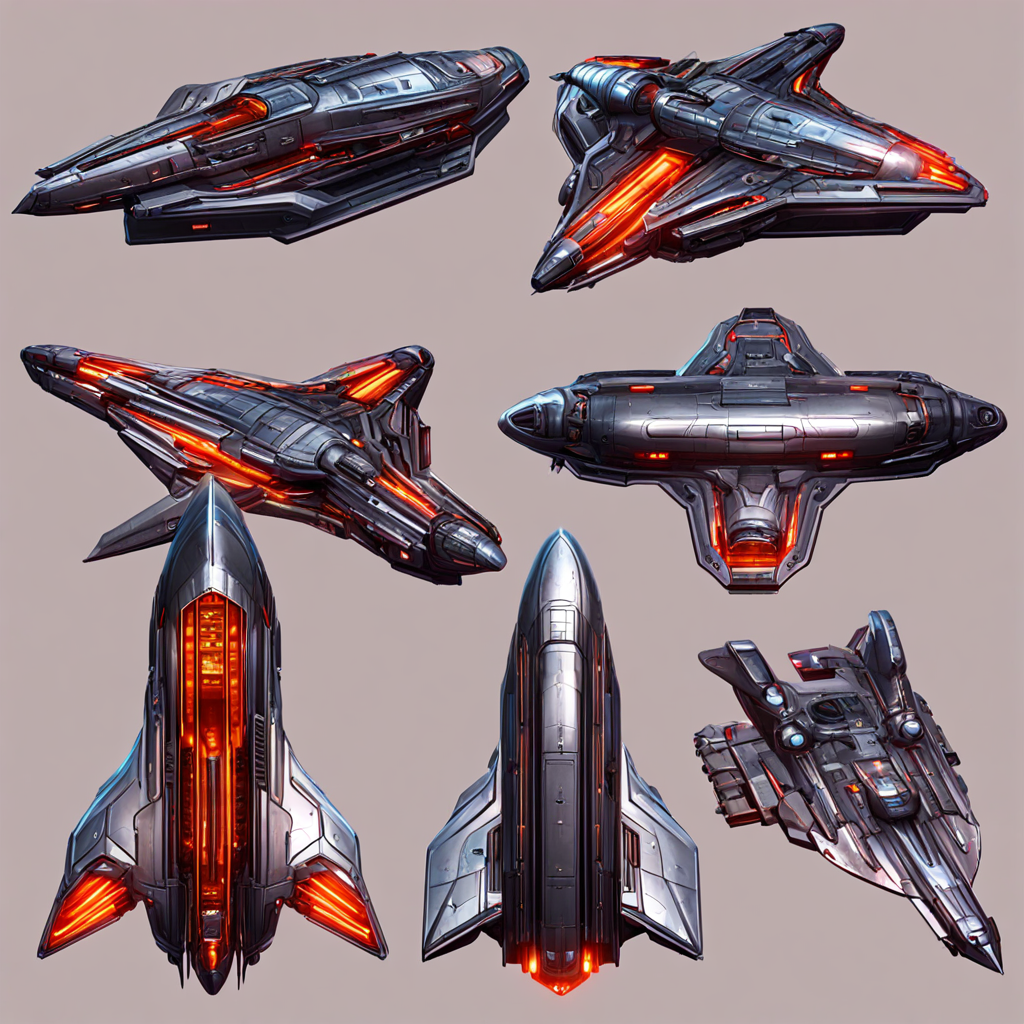

In [16]:
prompt="Top view rockstar game studio spritesheet silver shoot-em-up streamlined space ship, volumetric lighting, transparent background"
negative_prompt = "background, drop shadow, bokeh, painting, artwork, blocky, blur, ugly, old, boring, stupid, cockeyed, blurry, assymetrical, unrealistic, grayscale, bad anatomy, unnatural irises, no pupils, blurry eyes, dark eyes, extra limbs, deformed, disfigured eyes, out of frame, no irises, assymetrical face, broken fingers, extra fingers, disfigured hands"
# prompt="Photograph of woman in red dress in a luxury garden surrounded with blue, yellow, purple and flowers in many colors, high class, award-winning photography, Portra 400, full format"
prompt += "3D, high detail, bright, photoquality, ultra realistic, masterpiece, 8k, cute"

num_inference_steps = 30
guidance_scale = 10

def soft_clamp_tensor(input_tensor, threshold=3.5, boundary=4):
    if max(abs(input_tensor.max()), abs(input_tensor.min())) < 4:
        return input_tensor
    channel_dim = 1

    max_vals = input_tensor.max(channel_dim, keepdim=True)[0]
    max_replace = ((input_tensor - threshold) / (max_vals - threshold)) * (boundary - threshold) + threshold
    over_mask = (input_tensor > threshold)

    min_vals = input_tensor.min(channel_dim, keepdim=True)[0]
    min_replace = ((input_tensor + threshold) / (min_vals + threshold)) * (-boundary + threshold) - threshold
    under_mask = (input_tensor < -threshold)

    return torch.where(over_mask, max_replace, torch.where(under_mask, min_replace, input_tensor))

def normalize_tensor(input_tensor, boundary=4):
    min_val = input_tensor.min()
    max_val = input_tensor.max()

    normalization_factor = boundary / max(abs(min_val), abs(max_val))

    return input_tensor * normalization_factor

def center_tensor(input_tensor, channel_shift=1, full_shift=1, channels=[0, 1, 2, 3]):
    for channel in channels:
        input_tensor[0, channel] -= input_tensor[0, channel].mean() * channel_shift
    return input_tensor - input_tensor.mean() * full_shift

def callback(pipe, step_index, timestep, cbk):
    if timestep > 950:
        threshold = max(cbk["latents"].max(), abs(cbk["latents"].min())) * 0.998
        cbk["latents"] = soft_clamp_tensor(cbk["latents"], threshold*0.998, threshold)
    if timestep < 500 and timestep > 200:
        cbk["latents"] = center_tensor(cbk["latents"], 0.8, 0.8)
    if timestep > 1 and timestep < 100:
        cbk["latents"] = center_tensor(cbk["latents"], 0.6, 1.0)
        cbk["latents"] = normalize_tensor(cbk["latents"])
    return cbk

image = base(prompt, negative_prompt=negative_prompt, num_inference_steps=num_inference_steps, guidance_scale = guidance_scale, callback_on_step_end=callback, callback_on_step_end_inputs=["latents"], generator=torch.manual_seed(7777), denoising_end=0.8 if use_refiner else 1.0, output_type="latent" if use_refiner else "pil").images
if use_refiner: image = refiner(prompt, negative_prompt=negative_prompt, num_inference_steps=num_inference_steps, callback_on_step_end=callback, callback_on_step_end_inputs=["latents"], generator=torch.manual_seed(7777), denoising_start=0.8, image=image).images
display(image[0])

In [ ]:
!zip -r png_files.zip *.png
!rm -r *.png